# Face Detection Project Test Notebook
We'll start of with static facial detection

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imagePath = "images/face.jpg"

In [4]:
img = cv2.imread(imagePath)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

Below is the call for the pretrained face classifier above
- **scaleFactor** is to scale down input image 
- **minNeighbors** is the number of windows needed for an actual positive. Small number leads to high number of false positive, large number leads to false negatives
- **minSize** is the size of the smallest object that can be detected

In [5]:
face = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

Now a Bounding Box will be drawn

In [6]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1919.5, 1079.5, -0.5)

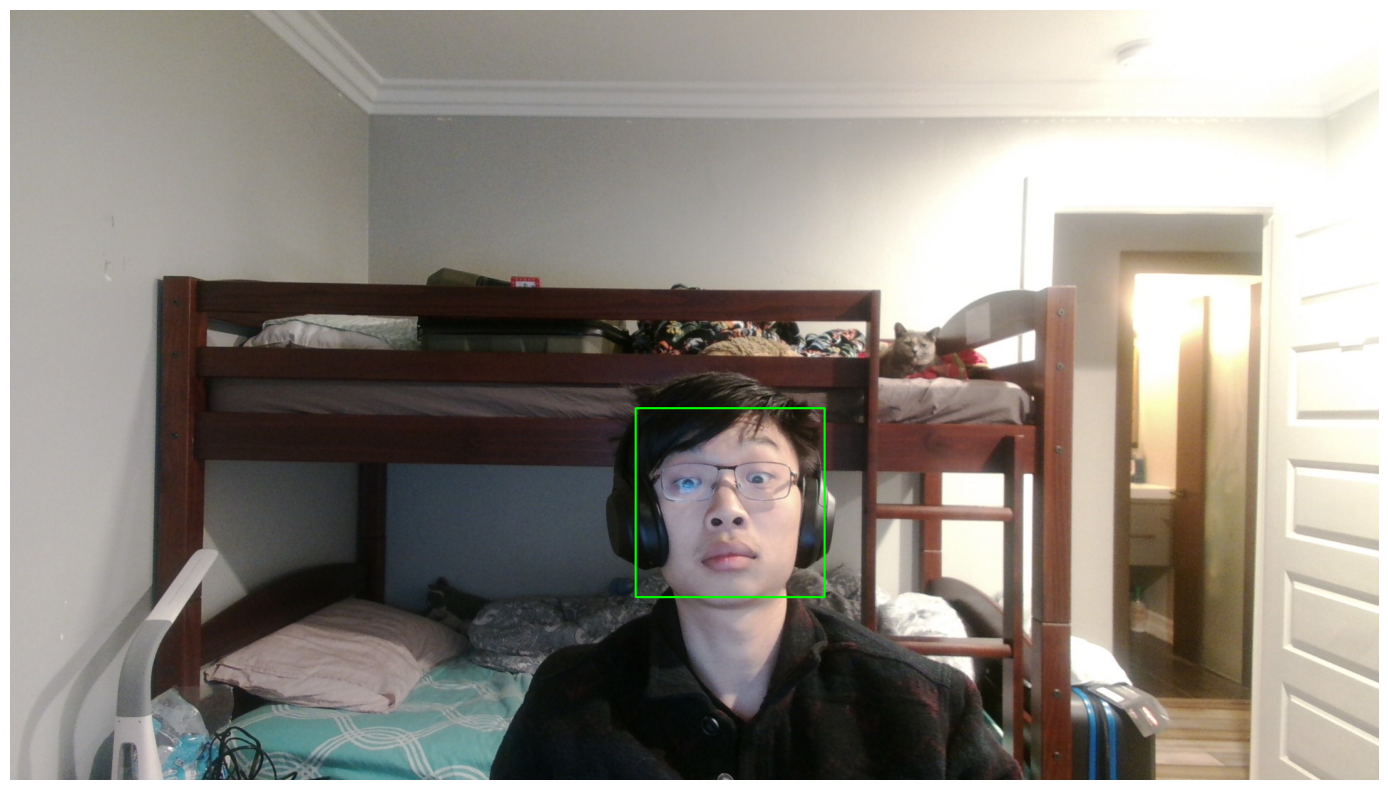

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis("off")

## Real-time Face detection
Using same model and classfier, however need webcam access

In [8]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

If you're using WSL you have to use the following workaround as the devices are not connected to the Linux Terminal: https://learn.microsoft.com/en-us/windows/wsl/connect-usb
https://github.com/dorssel/usbipd-win 

This is assuming it's a USB device. Built in camera might need different solution

Steps are simplified as following
- Need to install **usbipd** on Windows
- In Powershell (*e w w*) run **usbipd list** and find list of devices
- run **usbpid bind --busid=\<BUSID\>** in Powershell
- Lastly run **usbipd attach --wsl --busid=\<BUSID\>** in Powershell

Connection should persist after restart

https://github.com/PINTO0309/wsl2_linux_kernel_usbcam_enable_conf might be needed to fix it 
https://www.youtube.com/watch?v=t_YnACEPmrM This tutuorial also works well

This might be one of the only times to use windows smodge

In [13]:
video_capture = cv2.VideoCapture(1)

Following is function for updating bounding box during video

In [14]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

Next is an indefinite while loop that will capture video and apply face detection to it

In [16]:
while True:
    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()